In [1]:
cd /content/drive/MyDrive/Stock Price Prediction/Google Stock Price Prediction

/content/drive/MyDrive/Stock Price Prediction/Google Stock Price Prediction


# Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,LSTM,Bidirectional,Input,Dropout

# Reading the Dataset

In [3]:
data=pd.read_csv('google_dataset.csv')

In [4]:
data.head()

close     high  ...  divCash  splitFactor
GOOG 2016-01-11 00:00:00+00:00  716.03  718.855  ...      0.0          1.0
     2016-01-12 00:00:00+00:00  726.07  728.750  ...      0.0          1.0
     2016-01-13 00:00:00+00:00  700.56  734.740  ...      0.0          1.0
     2016-01-14 00:00:00+00:00  714.72  721.925  ...      0.0          1.0
     2016-01-15 00:00:00+00:00  694.45  706.740  ...      0.0          1.0

[5 rows x 12 columns]

# Extracting the Closing Price

In [5]:
close_price=data['close']

In [6]:
close_price

GOOG  2016-01-11 00:00:00+00:00     716.03
      2016-01-12 00:00:00+00:00     726.07
      2016-01-13 00:00:00+00:00     700.56
      2016-01-14 00:00:00+00:00     714.72
      2016-01-15 00:00:00+00:00     694.45
                                    ...   
      2020-12-30 00:00:00+00:00    1739.52
      2020-12-31 00:00:00+00:00    1751.88
      2021-01-04 00:00:00+00:00    1728.24
      2021-01-05 00:00:00+00:00    1740.92
      2021-01-06 00:00:00+00:00    1735.29
Name: close, Length: 1257, dtype: float64

In [7]:
close_price=np.array(close_price)

In [8]:
close_price

array([ 716.03,  726.07,  700.56, ..., 1728.24, 1740.92, 1735.29])

In [9]:
close_price.shape

(1257,)

# Plotting the closing price

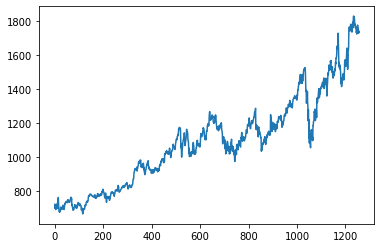

In [10]:
plt.plot(close_price)

# Applying MinMax Scaler

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
minmax=MinMaxScaler()

In [13]:
close_price=minmax.fit_transform(close_price.reshape(-1,1))

In [14]:
minmax.data_min_

array([668.26])

In [15]:
minmax.data_max_

array([1827.99])

# Converting the data into time stamps of 100 days

In [16]:
sample=[]
data_stamps=[]
price=[]


for i in range(1157):
  sample=[]
  for j in range(i,100+i):
    sample.append(close_price[j])
  price.append(close_price[100+i])
  data_stamps.append(sample)

In [17]:
data_stamps=np.array(data_stamps)

In [18]:
data_stamps.shape

(1157, 100, 1)

In [19]:
price=np.array(price)

In [20]:
price.shape

(1157, 1)

# Splitting the datastamps into training and testing samples

In [22]:
x_train=data_stamps[:int(0.7*len(list(data_stamps)))]
y_train=price[:int(0.7*len(list(data_stamps)))]

x_test=data_stamps[int(0.7*len(list(data_stamps))):]
y_test=price[int(0.7*len(list(data_stamps))):]


# Defining a nueral network

In [23]:
model=Sequential()
model.add(Bidirectional(LSTM(100,return_sequences=True),input_shape=(100,1)))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 100, 200)          81600     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               240800    
_________________________________________________________________
dense (Dense)                (None, 64)                12864     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 335,329
Trainable params: 335,329
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='Adam',loss='mse')

# Training a model

In [26]:
model.fit(x=x_train,y=y_train,epochs=50)

Epoch 1/50
26/26 [==============================] - 12s 25ms/step - loss: 0.0250
Epoch 2/50
26/26 [==============================] - 1s 24ms/step - loss: 0.0016
Epoch 3/50
26/26 [==============================] - 1s 23ms/step - loss: 9.6277e-04
Epoch 4/50
26/26 [==============================] - 1s 24ms/step - loss: 7.1448e-04
Epoch 5/50
26/26 [==============================] - 1s 23ms/step - loss: 5.2108e-04
Epoch 6/50
26/26 [==============================] - 1s 23ms/step - loss: 6.0279e-04
Epoch 7/50
26/26 [==============================] - 1s 24ms/step - loss: 4.7475e-04
Epoch 8/50
26/26 [==============================] - 1s 23ms/step - loss: 6.4347e-04
Epoch 9/50
26/26 [==============================] - 1s 24ms/step - loss: 5.5657e-04
Epoch 10/50
26/26 [==============================] - 1s 24ms/step - loss: 5.9857e-04
Epoch 11/50
26/26 [==============================] - 1s 23ms/step - loss: 4.7923e-04
Epoch 12/50
26/26 [==============================] - 1s 24ms/step - loss: 4.6964e

In [29]:
model.evaluate(x_test,y_test)

11/11 [==============================] - 2s 10ms/step - loss: 0.0022


0.0022354447282850742

# Predicting the test data

In [30]:
y_pred=model.predict(x_test)

In [31]:
y_pred

array([[0.44269556],
       [0.4458698 ],
       [0.44679153],
       [0.43159446],
       [0.4292084 ],
       [0.4287522 ],
       [0.43104386],
       [0.44208878],
       [0.44746682],
       [0.44233203],
       [0.44353345],
       [0.45637393],
       [0.46194345],
       [0.46419853],
       [0.4652094 ],
       [0.4708404 ],
       [0.47948474],
       [0.486174  ],
       [0.48532528],
       [0.48261416],
       [0.48188755],
       [0.48437282],
       [0.48260194],
       [0.4834775 ],
       [0.47781464],
       [0.4865797 ],
       [0.4903167 ],
       [0.4852075 ],
       [0.4790465 ],
       [0.46963015],
       [0.45262834],
       [0.44846416],
       [0.4569769 ],
       [0.46277052],
       [0.45799768],
       [0.4597182 ],
       [0.46295   ],
       [0.4670014 ],
       [0.4689768 ],
       [0.4798624 ],
       [0.4855333 ],
       [0.49116486],
       [0.4897634 ],
       [0.48794875],
       [0.4851477 ],
       [0.49072912],
       [0.4953611 ],
       [0.499

# Plotting closing prices of testing vs predicted data

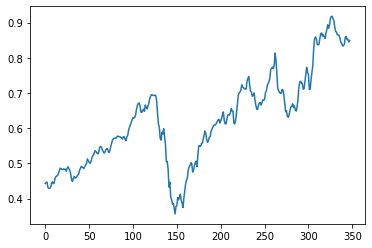

In [32]:
plt.plot(y_pred)

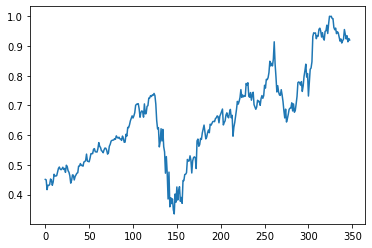

In [33]:
plt.plot(y_test)

# Saving the model

In [34]:
model.save('model.h5')